In [1]:
import numpy as np
import pandas as pd
from scipy.stats import zscore
import math

from discretization.sax.adaptive_sax import AdaptiveSAX
from discretization.sax.sax import SAX
from discretization.sax.graphics import plot_paa_sax_symbols
from approximation.paa import PAA
from utils import interpolate_segments, load_parquet_to_df_list

In [2]:
arr1 = zscore(np.random.normal(scale=0.5, size=1000))
arr2 = zscore(np.random.uniform(-3,3,size=1000))
arr3 = zscore(np.random.binomial(10, 0.5, 1000))
arr4 = np.random.uniform(size=1000)

df_norm = pd.DataFrame({0: arr1, 1: arr2, 2: arr3, 3: arr4})
df_norm

,0,1,2,3
0,2.426182,0.340876,-0.032836,0.515129
1,-1.021331,0.478566,-0.032836,0.235433
2,0.130544,0.694486,-1.320508,0.278862
3,0.937776,0.819891,-0.032836,0.401334
4,-0.493163,-1.294036,-0.676672,0.203975
...,...,...,...,...
995,-1.177972,0.887780,-0.032836,0.109883
996,-0.898717,-0.486202,-0.676672,0.673200
997,-0.562055,1.284516,-0.032836,0.158796
998,-0.623689,1.158292,-0.032836,0.183858


<AxesSubplot: >

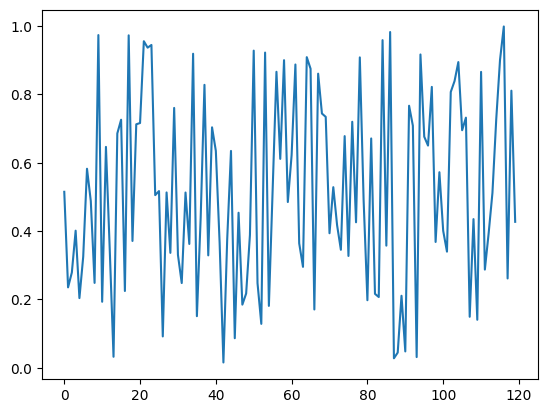

In [3]:
df_norm.iloc[:120,3].plot()

In [4]:
a_sax = AdaptiveSAX(alphabet_size=4)
a_sax.transform(df_norm)

(     0  1  2  3
 0    d  c  b  c
 1    b  c  b  a
 2    c  c  a  b
 3    c  d  b  b
 4    b  a  a  a
 ..  .. .. .. ..
 995  a  d  b  a
 996  b  b  a  c
 997  b  d  b  a
 998  b  d  b  a
 999  c  a  d  c
 
 [1000 rows x 4 columns],
           0         1         2         3
 0 -1.030519 -0.934811 -0.546823  0.242826
 1 -0.013392 -0.108336  0.289082  0.495543
 2  1.006734  0.773672  1.053871  0.759308)

In [5]:
# load time series dataset into dataframe and z-normalize it
path = "../../../../0_data/UCRArchive_2018/SwedishLeaf/train"
df_list = load_parquet_to_df_list(path)

# only select columns with data ('signal') and ignore class labels ('pattern_main_id')
df_norm = [zscore(df["signal"]) for df in df_list]

# single dataframes in list can be concatenated, because every time series (i.e. dataframe) has same length (i.e. column length)
# then work can be done solely on this one dataframe
df_norm = pd.concat([df_norm[0], df_norm[1]], axis=1)
df_norm

,signal,signal
0,2.223633,1.879365
1,2.058567,1.733153
2,1.849589,1.579823
3,1.642328,1.402389
4,1.438219,1.257130
...,...,...
123,1.345195,1.162620
124,1.547908,1.314745
125,1.760490,1.500432
126,1.970141,1.657326


In [6]:
paa = PAA(window_size=5)
df_paa = paa.transform(df_norm)

In [7]:
a_sax = AdaptiveSAX(alphabet_size=4)
df_a_sax, df_breakpoints = a_sax.transform(df_paa)
df_a_sax

,signal,signal
0,d,d
1,d,d
2,c,c
3,b,b
4,b,b
5,a,b
6,a,a
7,a,a
8,a,a
9,b,b


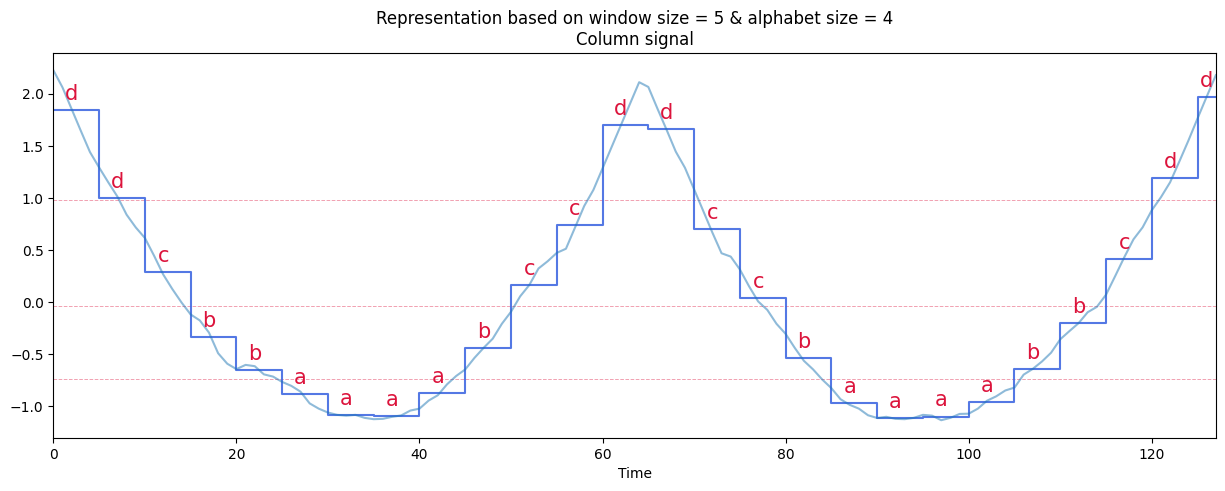

In [8]:
num_column = 0
plot_paa_sax_symbols(df_norm, df_paa, df_a_sax, np.array(df_breakpoints.iloc[:, num_column]), a_sax.alphabet_size, paa.window_size, num_column=num_column)

In [9]:
from discretization.symbol_mapping import IntervalNormMedian, IntervalMean, MeanValuePoints, MedianValuePoints


# standard normal distribution is stretched across y-axix, median of each interval is taken
# symbol_mapping = IntervalNormMedian(alphabet_size=sax_variant.alphabet_size)

# method to find a good lower bound
# symbol_mapping = IntervalMean(lower_bound=-1.8)

# symbol_mapping = MeanValuePoints(X_train)

symbol_mapping = MedianValuePoints(df_norm)

In [10]:
df_inv_a_sax = a_sax.inv_transform(df_a_sax, df_norm.shape[0], paa.window_size, symbol_mapping, df_breakpoints)

<AxesSubplot: >

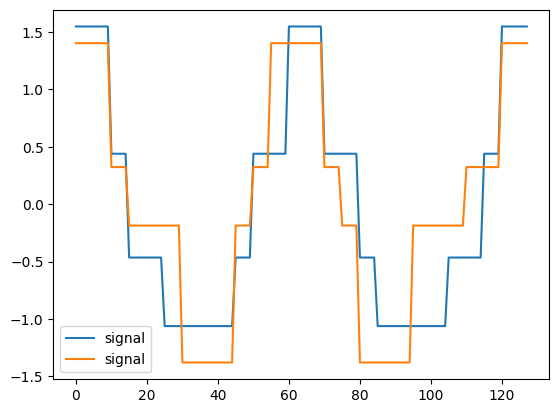

In [11]:
df_inv_a_sax.plot()